<a href="https://colab.research.google.com/github/reypowgithub/Tugas_PCD_TelU_2023/blob/main/Tugas_PCD_Assigment5_1301204091_1301204322.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CII4F3 PEMROSESAN CITRA DIGITAL**

---

# Assignment 5: Image Restoration

---

<p>Nama = Reynhard Powiwi - Bima Andika P</p>
<p>Kelas = IF-44-PIL-IS02 📚👨‍🎓</p>

---

Tugas berikut dikerjakan berkelompok dengan anggota tim 2 orang.

1. Cari paper dengan code (di github) terkait dengan metode image restoration. Silakan eksplorasi di web https://openaccess.thecvf.com/menu untuk menemukan papernya.
2. Sekaligus eksplorasi sourcecodenya sampai dapat dijalankan di  Google Colab anda. Lakukan explorasi dengan menggunakan beberapa image milik anda dan lakukan tahapan-tahapan dalam proses image restorasi yang anda pilih. Sampai diperoleh hasilnya.
3. Dalam file colab anda tulis dari mana sumber githubnya.
4. Link program di Google Colab dan file .zip no (6) kirim ke e-mail dosen pengampu dengan body email  "Tugas_PCD_Assigment5_NIM1_NAMA1_NIM2_NAMA2".
5. Kumpulkan juga
*   Link program di Google Colab
*   paper asli
*   files image input
*   files citra output

semua di zip disubmit ke LMS ini. (kl tidak bisa terupload, boleh dikirim beberapa file)


1) lakukan import library dan inputan gambar

In [2]:
# Import Library
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab import files  # Import library for file uploads
from google.colab.patches import cv2_imshow
from numpy.fft import fft2, ifft2
from scipy.signal import gaussian, convolve2d
from PIL import Image

In [3]:
# Buat untuk dapat melakukan upload gambar
uploaded = files.upload()

# Print list of uploaded files
print(uploaded.keys())

Saving 002.png to 002.png
dict_keys(['002.png'])


Pertama yang harus kita lakukan adalah mengimport semua library yang dibutuhkan untuk pengerjaan project ini. kemudian kita membuat inputan files untuk memasukan citra yang akan kita proses.

2) Membuat Fungsi Image-restoration

Fungsi **blur** tersebut digunakan untuk melakukan pengaburan (blurring) pada gambar menggunakan berbagai jenis filter.

In [4]:
def blur(img, mode = 'box', kernel_size = 3):
    # mode = 'box' or 'gaussian' or 'motion'
    dummy = np.copy(img) # Salin gambar input ke variable dummy
    if mode == 'box':
        #gunakan kernel dengan elemen bernilai 1 dan normalisasi berdasarkan ukuran kernel
        h = np.ones((kernel_size, kernel_size)) / kernel_size ** 2
    elif mode == 'gaussian':
        #buat kernel gaussian dengan distribusi sesuai ukuran kernel
        h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
        h = np.dot(h, h.transpose())
        h /= np.sum(h)
    elif mode == 'motion':
        #gunakan kernel identitas dengan normalisasi berdasarkan ukuran kernel
        h = np.eye(kernel_size) / kernel_size
    #menerapkan filter ke gambar dengan model valid agar hasil memiliki ukuran yang sesuai
    dummy = convolve2d(dummy, h, mode = 'valid')
    return dummy

Fungsi **add_gaussian_noise** digunakan untuk menambahkan noise Gaussian ke dalam gambar.

In [5]:
def add_gaussian_noise(img, sigma):
    gauss = np.random.normal(0, sigma, np.shape(img)) #buat noise gaussian dengan distribusi normal
    noisy_img = img + gauss #tambahkan noise gaussian kesetoap piksel gambar input
    #Batasi agar nilai piksel hasil penambahan noise agar tetap berada di rentang 0 - 255
    noisy_img[noisy_img < 0] = 0
    noisy_img[noisy_img > 255] = 255
    return noisy_img

Fungsi **wiener_filter** menerapkan filter Wiener pada gambar untuk mengurangi noise

In [6]:
def wiener_filter(img, kernel, K):
    #normalisasi kernel dengan membaginya oleh jumlah elemen kernel
    kernel /= np.sum(kernel)
    dummy = np.copy(img)
    #lakukan transformasi fast fourier pada gambar input
    dummy = fft2(dummy)
    #lakukan transformasi fast fourier pada kernel dengan ukuran sesuai dengan gambar input
    kernel = fft2(kernel, s = img.shape)
    #hitung kernel wiener sebagai konjugat kompleks dari kernel
    kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
    #kalikan hasil fft dengan kernel wiener
    dummy = dummy * kernel
    #lakukan invers fft untuk mendapatkan gambar hasil filter wiener
    dummy = np.abs(ifft2(dummy))
    return dummy

Fungsi **gaussian_kernel** adalah fungsi untuk membuat kernel Gaussian dengan ukuran tertentu.


In [7]:
def gaussian_kernel(kernel_size = 3):
    h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
    h = np.dot(h, h.transpose())
    h /= np.sum(h)
    return h

Fungsi **rgb2gray** adalah fungsi untuk mengubah gambar berwarna (mode RGB) menjadi citra grayscale menggunakan formula tertentu.

In [8]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

2) Menampilkan citra RGB

Kode berikut digunakan untuk memuat gambar dalam format RGB menggunakan OpenCV dan menampilkannya menggunakan Matplotlib. Berikut adalah penjelasan langkah-langkahnya:




1.   Pertama memilih file gambar yang akan digunakan dari daftar file yang diunggah
2.   Kemudian kita membaca ga,bar RGB menggunakan CV2. Argumen -1 menandakan bahwa semua saluran warna (termasuk saluran alpha jika ada) harus dibaca.
3.   Setelah membaca gambar dengan OpenCV, citra biasanya berada dalam urutan warna BGR (Blue, Green, Red). Langkah ini mengonversinya ke urutan warna RGB yang umum digunakan dalam banyak aplikasi.
4.   Kemudian kita manampilkan gambar dengan matplot





Text(0.5, 1.0, 'Citra RGB Asal')

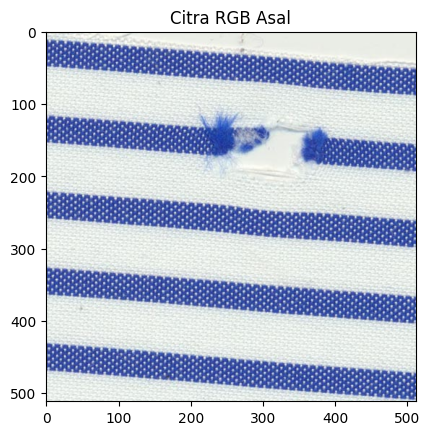

In [9]:
# Pilih file yang ingin Anda gunakan
file_name = list(uploaded.keys())[0]

# Memuat gamber RGB menggunakan CV2
image_rgb = cv2.imread(file_name, -1)
image_rgb = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)

# menampilkan citra
plt.imshow(image_rgb)
plt.title('Citra RGB Asal')



In [10]:
#Mengubah gambar menjadi greyscale
greyscale_img = rgb2gray(np.array(Image.open(file_name)))

#Menggunakan fungsi blur
blurred_img = blur(greyscale_img, mode = 'motion', kernel_size = 3)

#Menggunakan fungsi add_gaussian_noise pada blured image
noisy_img = add_gaussian_noise(blurred_img, sigma = 20)

#Menggunakan fungsi gaussian_kernel
kernel = gaussian_kernel(3)

#Menggunakan wiener_filter
filtered_img = wiener_filter(noisy_img, kernel, K = 30)

<ipython-input-7-9577786009de>:2: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)


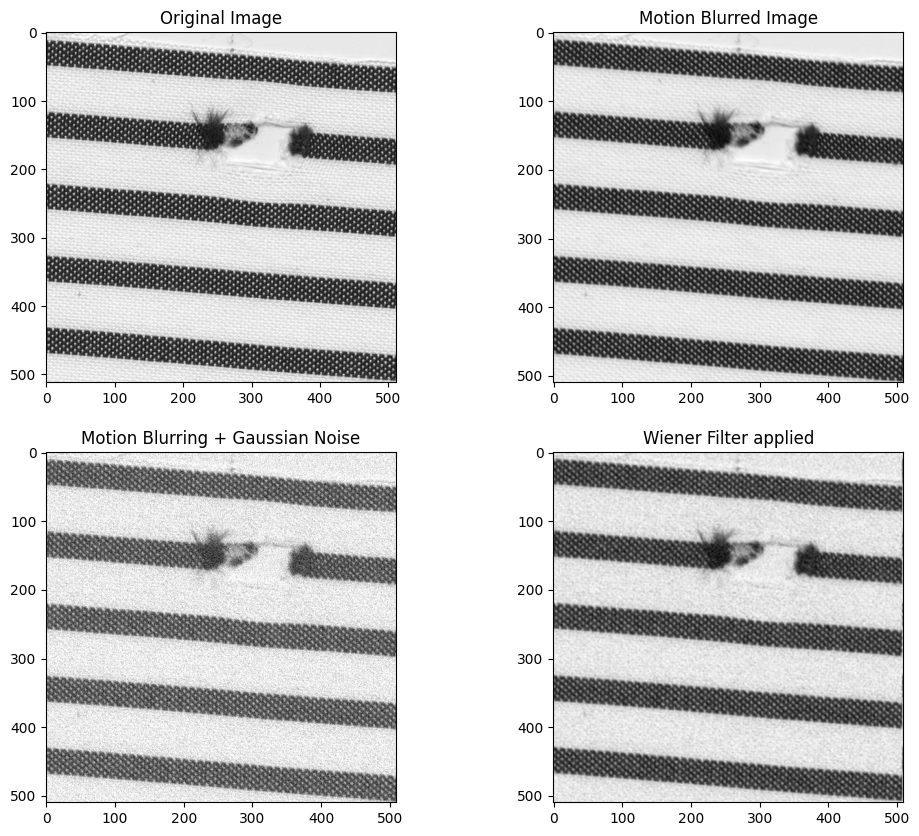

In [11]:
#deklarasi varieble display dan label
display = [greyscale_img , blurred_img, noisy_img, filtered_img]
label = ['Original Image', 'Motion Blurred Image', 'Motion Blurring + Gaussian Noise', 'Wiener Filter applied']

#Plot hasil filtering
fig = plt.figure(figsize=(12, 10))

for i in range(len(display)):
    fig.add_subplot(2, 2, i+1)
    plt.imshow(display[i], cmap = 'gray')
    plt.title(label[i])

# Menyimpan plot dalam format PNG
plt.savefig('output_WienerFilter.png')

plt.show()

* Pemahaman dan penerapan metode restorasi citra sangat penting untuk meningkatkan kualitas citra yang telah mengalami pengaburan atau derau.
* etiap metode atau kombinasi metode memberikan dampak yang berbeda pada hasil akhir citra.
* Filter Wiener terbukti menjadi alat yang berguna dalam memperbaiki citra yang telah mengalami motion blurring dan penambahan derau Gaussian, tetapi pemilihan parameter perlu dilakukan dengan hati-hati untuk mencapai keseimbangan yang optimal antara merawat detail dan mengurangi derau.
---

**Referensi:**

*    [Referensi Paper]( https://openaccess.thecvf.com/content/WACV2023/papers/Bredell_Wiener_Guided_DIP_for_Unsupervised_Blind_Image_Deconvolution_WACV_2023_paper.pdf)





